<a href="https://colab.research.google.com/github/RYU-MCFLY/back-future/blob/main/Stieltjes_numerically.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sample covariance matrices with different spectrums of covariance matrix.**

Generate some random matrix samples and some random matrix densities.  For the densities, we use fixed point iteration, coming down from +i infinity.

We will iterate using the equations (r = $d/n$):

\begin{equation}%\label{eq:1}
(1) \qquad\quad m(z) = \frac{1}{r}\tilde{m}(z) + \frac{1 - r}{r z}
\end{equation}

and

$$ 
(2) \qquad\quad
\tilde{m}(z) = \left (-z + \frac{1}{n} \text{tr}[C(I_d - \tilde{m}(z) C)^{-1}] \right )^{-1} = \biggl(-z + r \int \frac{t \nu(dt)}{1+\tilde{m}(z)t}\biggr)^{-1}$$

Here $\nu$ is the empirical law of the covariance $C$.  We will try four cases:   
1.   $\nu = \delta_1$, that is deterministic and all 1
2.   $\nu = \tfrac{1}{2}\delta_5 +  \tfrac{1}{2}\delta_1$
3.   $\nu = \text{Exp}(1)$
4.   $\nu = \text{Pareto}(4)$

The strategy will be to use a fixed point method, where we choose a sequence of imaginary numbers coming from infinity, and then we iteratively apply the reccurence (1) and (2).


## **Identity covariance picture ($C = Id$)**

---

*   We generate the matrix and then compute the eigenvalues.
*   In this case, we recover the Marchenko-Pastur 

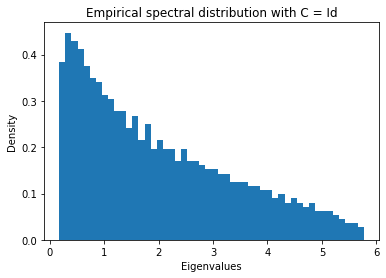

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
n=1000
d=2000
r=d/n

Wishart = np.random.randn(d,n)
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues
plt.hist(Weigs[Weigs > 0.001],bins=50,density=True)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical spectral distribution with C = Id')


plt.show()


**Covariance matrix with 1/2 eigenvalues at 1 and 1/2 at 9**
---

*   $C = \text{Diag}(1,1,1,1,...,9,9,9,9,...)$
*   Two "Marchenko-Pastur" distributions






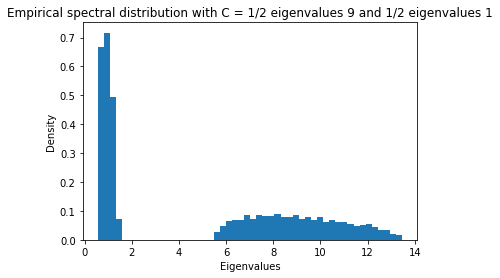

The mean eigenvalue is 4.96826


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg 

n=10000
d=1000
r=d/n

Wishart = np.random.randn(d,n)
CMatrix = np.diagflat(np.random.binomial(1,0.5,size=(n,1))*8 + 1)
sqrtCMatrix = np.sqrt(np.diagflat(np.random.binomial(1,0.5,size=(d,1))*8 + 1))
Wishart = sqrtCMatrix @ Wishart
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues

plt.hist(Weigs[(Weigs > 0.001) & (Weigs < 100)],bins=50,density=True)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical spectral distribution with C = 1/2 eigenvalues 9 and 1/2 eigenvalues 1')


plt.show()
print("The mean eigenvalue is {:.05f}".format(np.mean(Weigs[Weigs > 0.001])))

## **Covariance with C = diag(Pareto(4))**


*   Gives a heavy-tailed distribution for the large eigenvalues



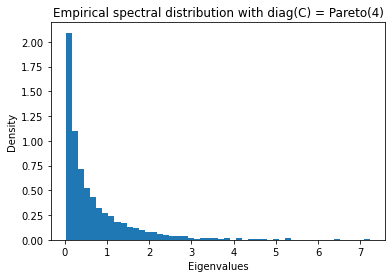

The mean eigenvalue is 0.66786


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg 

n=1000
d=2000
r=d/n

Wishart = np.random.randn(d,n) #Generates matrix with entries N(0,1)
CMatrix = np.diagflat(np.random.pareto(4,size=(d,1))) #Generates the covariance matrix
sqrtCMatrix = linalg.sqrtm(CMatrix)
Wishart = sqrtCMatrix @ Wishart
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues

plt.hist(Weigs[(Weigs > 0.001) & (Weigs < 100)],bins=50,density=True) #the last argument scales this to be a density
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical spectral distribution with diag(C) = Pareto(4)')

plt.show()
print("The mean eigenvalue is {:.05f}".format(np.mean(Weigs[Weigs > 0.001])))

## **Covariance with C = diag(Exp(1))**


*   Creates heavy-tailed large eigenvalues



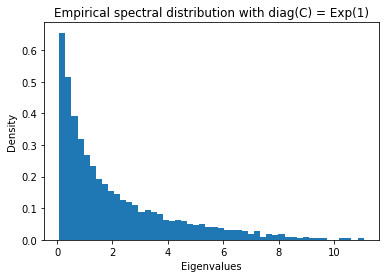

The mean eigenvalue is 2.04875


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg 

n=1000
d=2000
r=d/n

Wishart = np.random.randn(d,n) #Generates matrix with entries N(0,1)
CMatrix = np.diagflat(np.random.standard_exponential((d,1))) #Generates the covariance matrix
sqrtCMatrix = linalg.sqrtm(CMatrix)
Wishart = sqrtCMatrix @ Wishart
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues

plt.hist(Weigs[(Weigs > 0.001) & (Weigs < 100)],bins=50,density=True) #the last argument scales this to be a density
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical spectral distribution with diag(C) = Exp(1)')

plt.show()
print("The mean eigenvalue is {:.05f}".format(np.mean(Weigs[Weigs > 0.001])))

## **Covariance with C = diag(lognormal(mean = 1, variance = 1))**

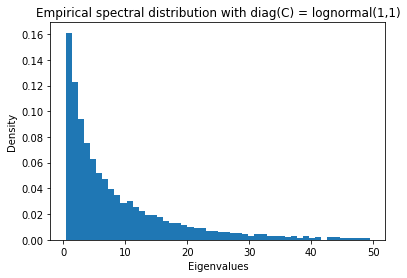

The mean eigenvalue is 9.28090


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg 

n=1000
d=2000
r=d/n

Wishart = np.random.randn(d,n) #Generates matrix with entries N(0,1)
CMatrix = np.diagflat(np.random.lognormal(size=(d,1), mean = 1)) #Generates the covariance matrix
sqrtCMatrix = linalg.sqrtm(CMatrix)
Wishart = sqrtCMatrix @ Wishart
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues

plt.hist(Weigs[(Weigs > 0.001) & (Weigs < 50)],bins=50,density=True) #the last argument scales this to be a density
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical spectral distribution with diag(C) = lognormal(1,1)')

plt.show()
print("The mean eigenvalue is {:.05f}".format(np.mean(Weigs[Weigs > 0.001])))

## **Bulk + Spikes Model**


*   Covariance $C$ is Identity + a sum of spikes, $C = Id + \sum_{i=1}^k \ell_i u_i u^T_i$ where $\|u\|_2 = 1$



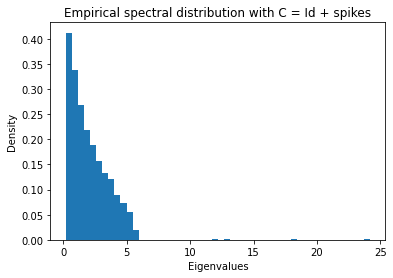

The mean eigenvalue is 2.05552


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg 

n=1000
d=2000
r=d/n

Wishart = np.random.randn(d,n)
z1 = np.random.randn(d,1)  
u1 = z1 / linalg.norm(z1)

z2 = np.random.randn(d,1) 
u2 = z2 / linalg.norm(z2)

z3 = np.random.randn(d,1) 
u3 = z3 / linalg.norm(z3)

z4 = np.random.randn(d,1) 
u4 = z4 / linalg.norm(z4)

z5 = np.random.randn(d,1) 
u5 = z5 / linalg.norm(z5)

CMatrix = np.diagflat(np.ones((d,1))) + 0.2 * u1 @ u1.transpose() + 9 * u2 @ u2.transpose() + 10 * u3 @ u3.transpose() + 15 * u4 @ u4.transpose() + 20 * u5 @ u5.transpose() 
sqrtCMatrix = linalg.sqrtm(CMatrix)
Wishart = sqrtCMatrix @ Wishart
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues

plt.hist(Weigs[(Weigs > 0.001) & (Weigs < 100)],bins=50,density=True)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Empirical spectral distribution with C = Id + spikes')

plt.show()
print("The mean eigenvalue is {:.05f}".format(np.mean(Weigs[Weigs > 0.001])))

# **Inversion of the Stieltjes transform**

Try to generate numerically the density, by creating an approximation to the Stieltjes transform.

## **Inversion of the Stieltjes transform for MP**

Stieltjes transform of Marchenko-Pastur

$$m(z) = \frac{1-r-z}{2zr} + \frac{\sqrt{(1+\sqrt{r})^2-z} \sqrt{(1-\sqrt{r})^2-z}}{2zr}$$
for $z \in \mathbb{C} \setminus \mathbb{R}^+$

To recover the density, we invert the Stieltjes
$$ \lim_{\varepsilon \downarrow 0} \frac{1}{\pi} \Im \left ( m(x + i\varepsilon) \right )  = \text{density of MP}$$

In this code, we take $\varepsilon > 0$ but close to $0$ and compute $\Im(m(x-i\varepsilon))$.

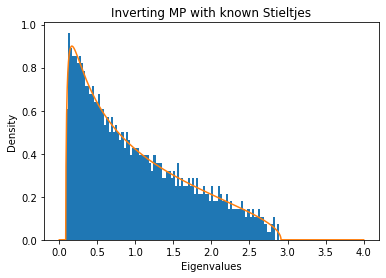

In [ ]:
'Assumes you know the Stieltjes transform of the Marchenko-Pastur'

xvals=np.linspace(0.001,4,num=1000)
ivals=np.logspace(6,-5,num=100)
mvals=np.zeros_like(xvals,dtype=np.complex)
mvals=-1/(xvals+ivals[0]*1.0j)

r=0.5

n=2000
d= int(n * r)

Wishart = np.random.randn(d,n)
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues
plt.hist(Weigs[Weigs > 0.001],bins=100,density=True)

zs = xvals + ivals[-1]*1.0j # complex numbers: z = x + i*epsilon where epsilon is small

'Formula for the Stieltjes transform of Marchenko-Pastur'
#mvals = (1-r-zs)/(2*r*zs) + np.sqrt(((1+np.sqrt(r))**2-zs)*((1-np.sqrt(r))**2-zs))/2*r*zs 
mvals = (1-r-zs)/(2*zs*r) - np.sqrt(((1+np.sqrt(r))**2-zs))*np.sqrt(((1-np.sqrt(r))**2-zs))/(2*zs*r)

'Inverting, taking only the imaginary part'
plt.plot(xvals, np.imag(mvals)/np.pi)

plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Inverting MP with known Stieltjes')

plt.show()

#sum(np.imag(mvals)*(4-0.001)/np.pi/1000) ##should be r

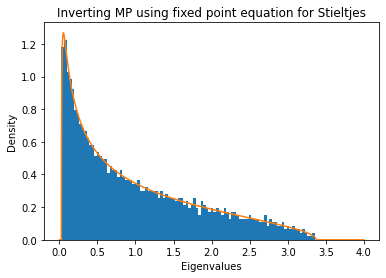

In [ ]:
'Plot the empirical distribution and theoretical without knowing the Stieltjes'

xvals=np.linspace(0.001,4,num=1000)
ivals=np.logspace(4,-8,num=10000)
mvals=np.zeros_like(xvals,dtype=np.complex)
mvals=-1/(xvals+ivals[0]*1.0j)
r=0.7

'Generates ESD'
n=2000
d= int(n * r)
Wishart = np.random.randn(n,d)
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues
plt.hist(Weigs[Weigs > 0.001],bins=100,density=True)

'Generates the theorectial inversion using a fixed point'
zs = xvals + ivals[0]*1.0j

#Solves the fixed point equation
for i in ivals:
  mvals = 1/(-xvals - i*1j + 1/(1+r*mvals))

plt.plot(xvals, np.imag(mvals)/np.pi)

plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Inverting MP using fixed point equation for Stieltjes')

plt.show()

## **Inverting Stieltjes transform for covariance C with eigenvalues 1/2 of the time 1 and the other 1/2 9**
The Stieltjes transform for general covariance matrix with ESD of C converging to $\nu$
\begin{equation}%\label{eq:1}
(1) \qquad\quad m(z) = \frac{1}{r}\tilde{m}(z) + \frac{1 - r}{r z}
\end{equation}

and

$$ 
(2) \qquad\quad
\tilde{m}(z) = \biggl(-z + r \int \frac{t \nu(dt)}{1+\tilde{m}(z)t}\biggr)^{-1}$$

In our case, $\nu = 0.5 \cdot \delta_1 + 0.5 \cdot \delta_9$ where $\delta_{\ell}$ is a dirac delta at $\ell$.

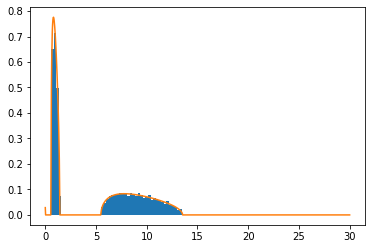

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

n=10000
d=1000
r=d/n

Wishart = np.random.randn(d,n)
CMatrix = np.diagflat(np.random.binomial(1,0.5,size=(d,1))*8 + 1)
sqrtCMatrix = np.sqrt(CMatrix)
Wishart = sqrtCMatrix @ Wishart
Wishart = (Wishart @ Wishart.transpose())/n
Weigs = np.real(np.linalg.eig(Wishart)[0]) #just keep the eigenvalues
plt.hist(Weigs[(Weigs > 0.001) & (Weigs < 30)],bins=50,density=True)

xvals=np.linspace(0.001,30,num=1000)
ivals=np.logspace(4,-8,num=10000)
mvals=np.zeros_like(xvals,dtype=np.complex)
mvals=-1/(xvals+ivals[0]*1.0j)

zs = xvals + ivals[0]*1.0j

'nu = 50% probability of being 9 and 50% probability of being 1'
for i in ivals:  
  mvals = 1/(-xvals - i*1j + r*(  0.5*1/(1+mvals) + 0.5*9/(1+9*mvals) ))

mvals = 1/r * mvals + (1-r) / ( r*zs )

plt.plot(xvals, np.imag(mvals)/np.pi)

plt.show()